In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [4]:
type(cancer.data)

numpy.ndarray

In [7]:
cancer.data.dtype

dtype('float64')

In [8]:
# 타이타닉
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
# 성별과  pclass 만으로 로지스틱 회귀 적용
X= titanic[["pclass","sex"]]
# X = titanic.loc[: , "plcass","sex"]  # 컬럼에서 범위를 주려면 X = titanic.loc[: , "plcass" : "sex"] 으로 하면 됨.
X
Y = titanic["survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [21]:
import pandas as pd
X2 = pd.get_dummies(X, columns=['pclass','sex'])

In [22]:

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X2, Y, random_state = 0, stratify=Y
)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.7919161676646707, 0.7713004484304933)

In [39]:
display(x_te.iloc[[0,1], :])
print(y_te[:2])
model.predict([
    [0, 1, 0, 0, 1],
    [0, 0, 1, 0, 1]
])

,pclass_1,pclass_2,pclass_3,sex_female,sex_male
288,0,1,0,0,1
869,0,0,1,0,1


288    1
869    1
Name: survived, dtype: int64


array([0, 0], dtype=int64)

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                   cancer['target'],
                                                   stratify=cancer['target'],
                                                   random_state = 0)
x_train.shape, x_test.shape

((426, 30), (143, 30))

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.916083916083916)

In [78]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [48]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter = 10000).fit(x_train, y_train)
# model.score(x_train, y_train), model.score(x_test, y_test)
# (0.9671361502347418, 0.9370629370629371)

(0.9671361502347418, 0.9370629370629371)

In [49]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier().fit(x_train, y_train)
# model.score(x_train, y_train), model.score(x_test, y_test)
# (0.9460093896713615, 0.916083916083916)

(0.9460093896713615, 0.916083916083916)

In [51]:
model.feature_importances_

array([0.        , 0.02831198, 0.        , 0.        , 0.00752597,
       0.        , 0.        , 0.        , 0.01101841, 0.00501731,
       0.00243087, 0.00980366, 0.        , 0.00999282, 0.        ,
       0.00668975, 0.        , 0.        , 0.        , 0.00401385,
       0.        , 0.02958161, 0.72534081, 0.03687207, 0.00931787,
       0.        , 0.        , 0.10516335, 0.        , 0.00891967])

<AxesSubplot:>

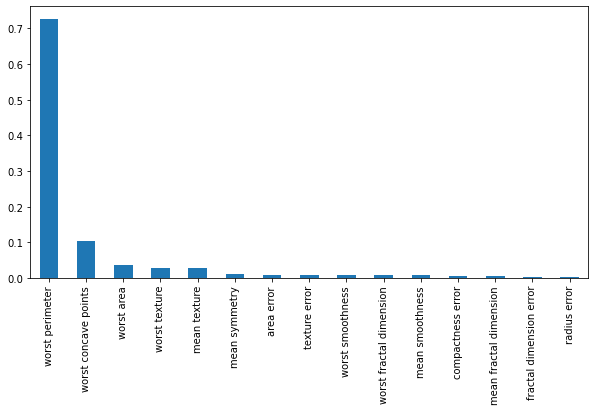

In [52]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

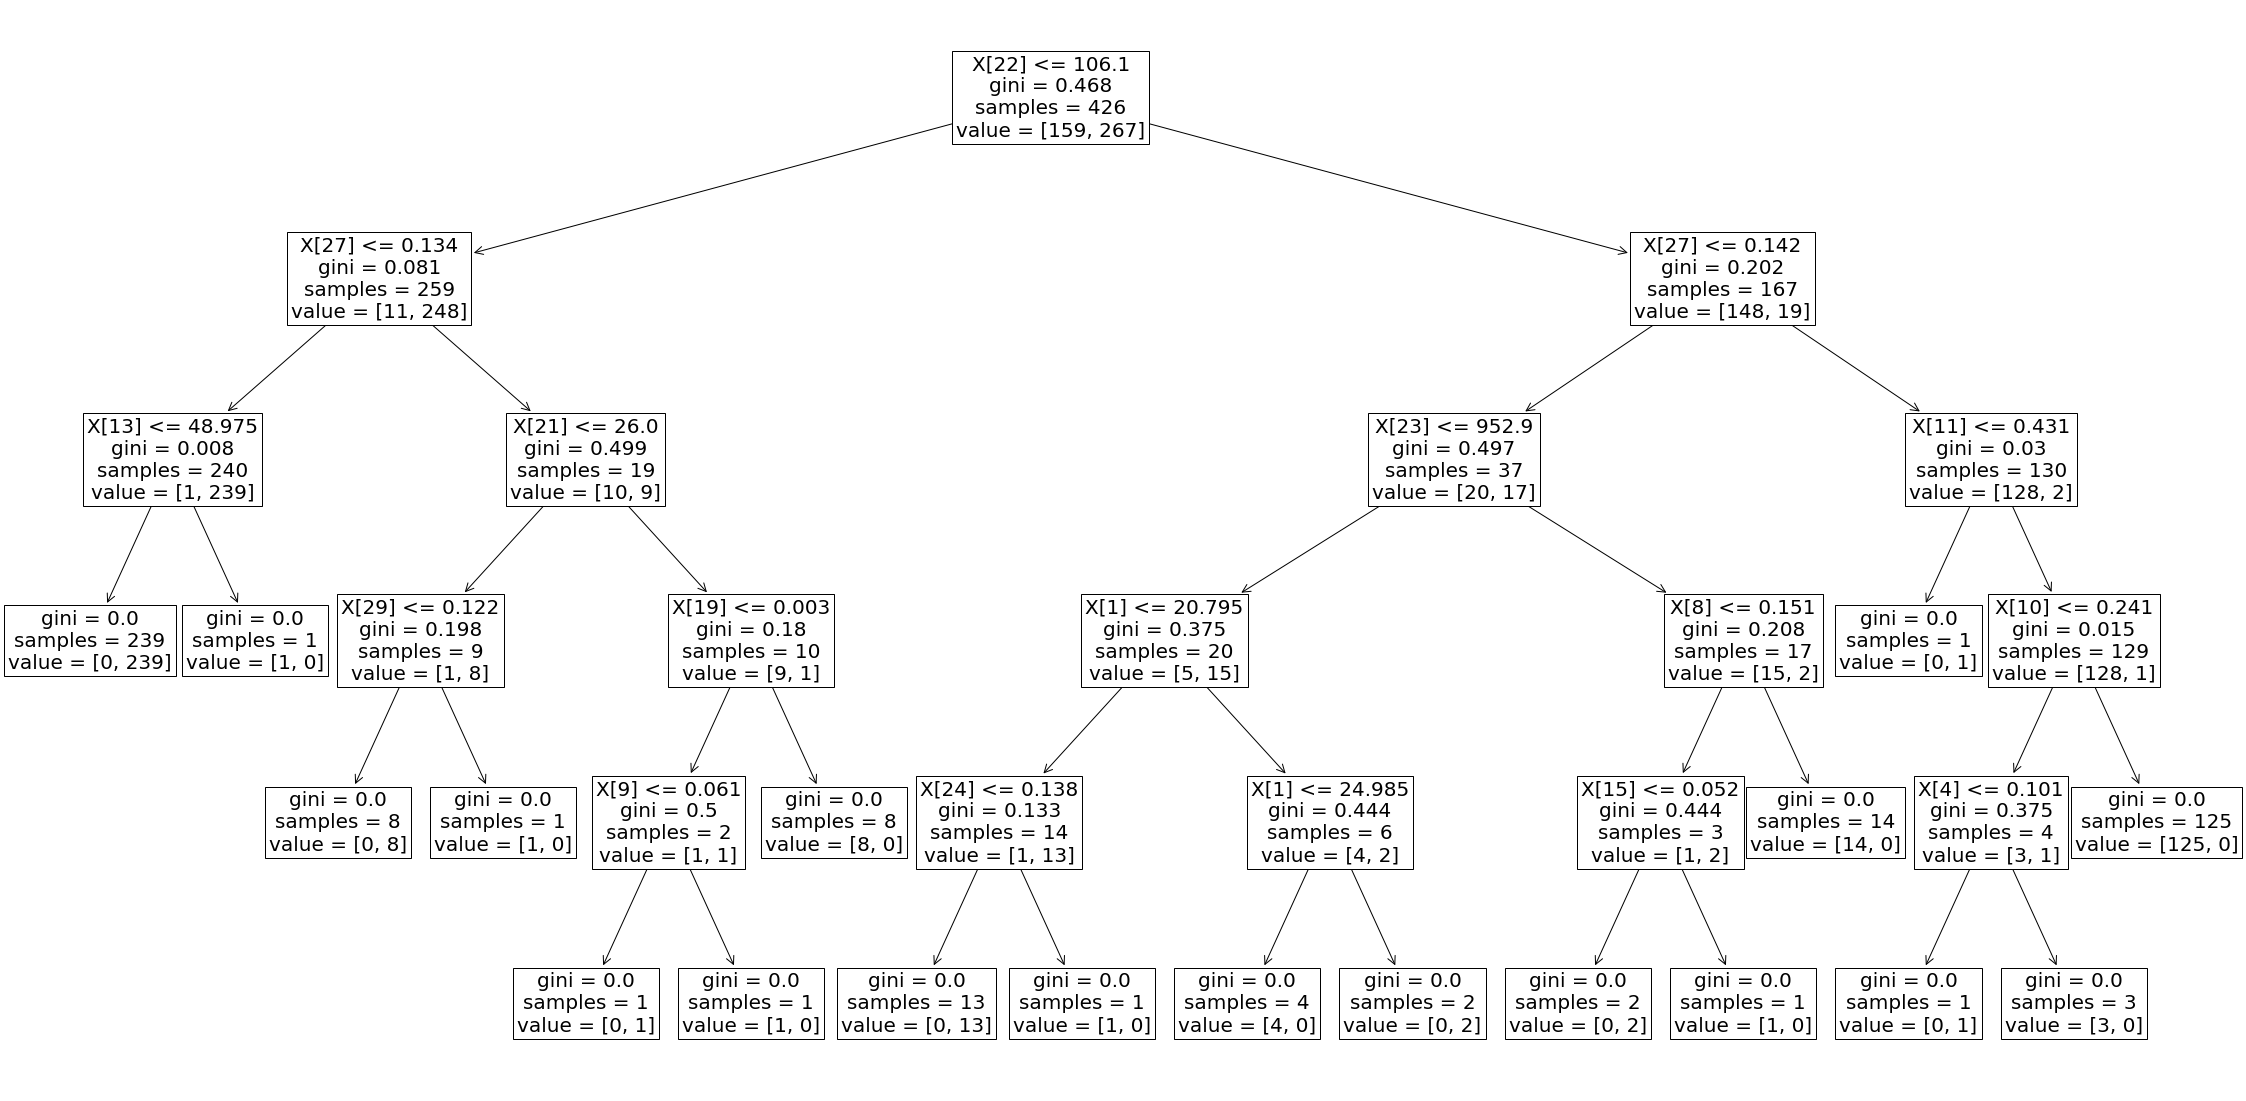

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))

from sklearn import tree
tree.plot_tree(model,fontsize=20)
plt.show()

In [97]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston['data'],
                                                   boston['target'],
                                                   random_state=0)

In [98]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6536702064534909)

In [81]:
model.feature_importances_

array([5.63938755e-02, 2.17303977e-04, 1.10895696e-02, 0.00000000e+00,
       1.63041538e-02, 2.43522246e-01, 7.30882200e-03, 2.79913082e-02,
       1.58372147e-03, 1.04370278e-02, 3.07497023e-02, 6.90203497e-03,
       5.87500234e-01])

<AxesSubplot:>

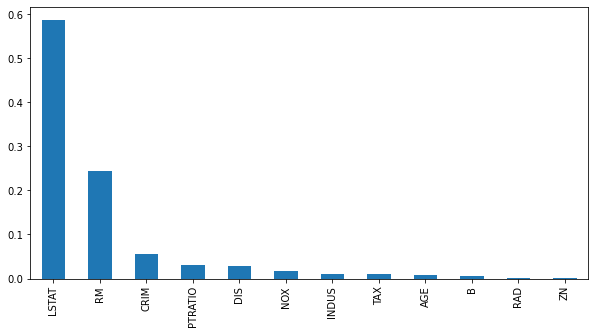

In [82]:
import pandas as pd
fi = pd.Series(model.feature_importances_, index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

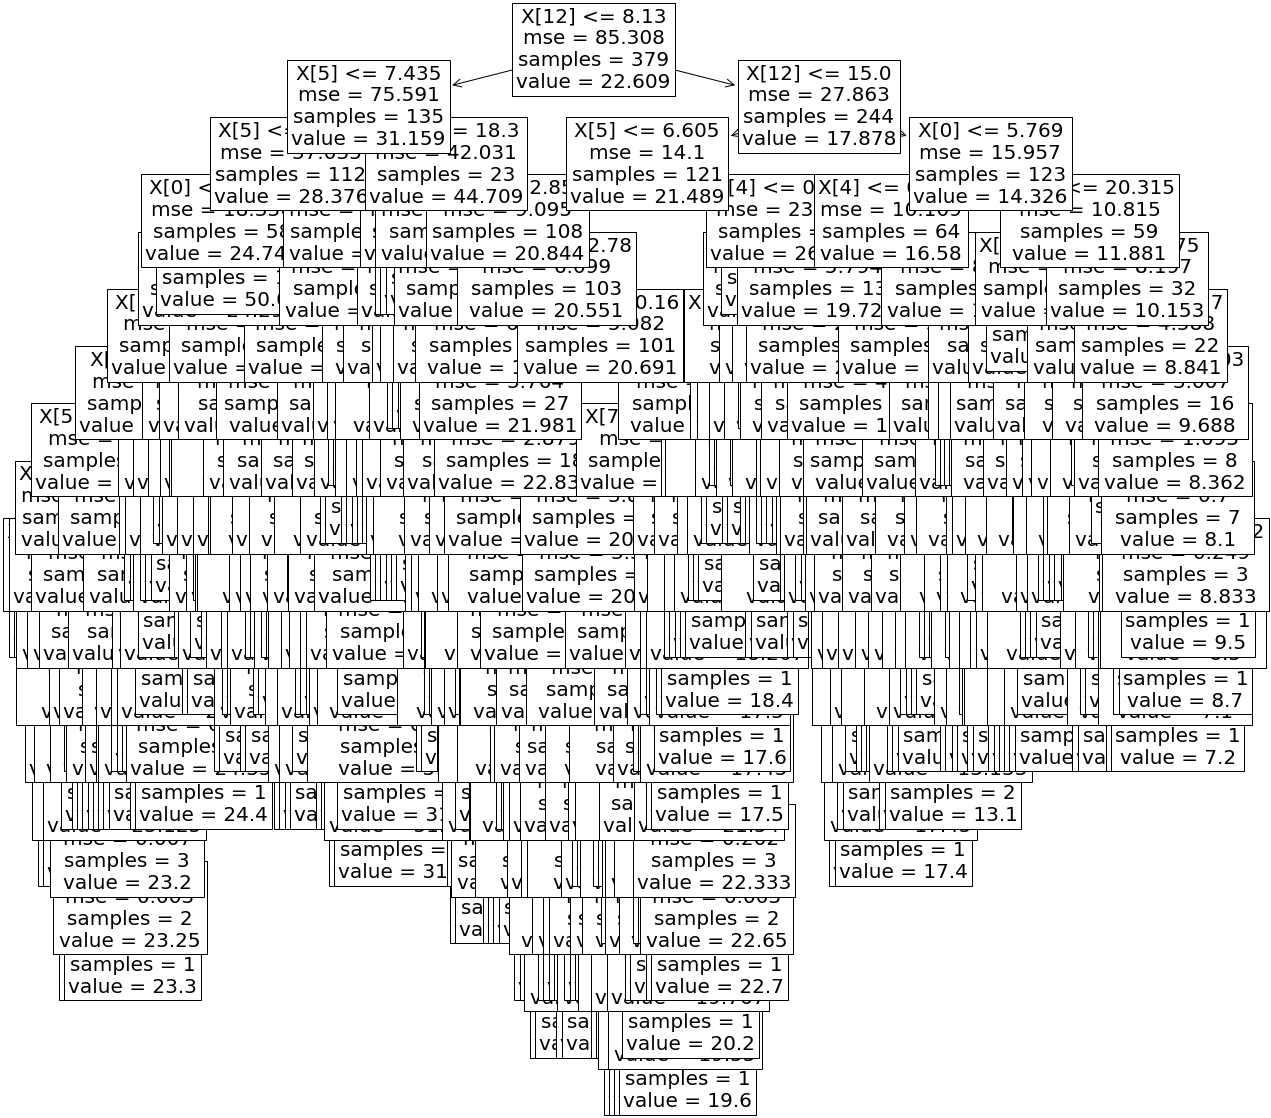

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

from sklearn import tree
tree.plot_tree(model,fontsize=20)
plt.show()

In [ ]:
# Ensemble 실습, 위스콘신 유방암 진단 해보기

In [84]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                   cancer['target'],
                                                   stratify=cancer['target'],
                                                   random_state = 0)
x_train.shape, x_test.shape

((426, 30), (143, 30))

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
dt3 = DecisionTreeClassifier(max_depth=3)
dt5 = DecisionTreeClassifier(max_depth=5)

In [87]:
from sklearn.ensemble import VotingClassifier
hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr',lr), 
                         ('dt3',dt3), ('dt5',dt5)])
soft = VotingClassifier([('knn1', knn1), ('knn2',knn2), ('lr',lr), 
                         ('dt3',dt3), ('dt5',dt5)], voting='soft')

In [88]:
names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
    model.fit(x_train, y_train)
    name = names[idx]
    train_score = model.score(x_train, y_train) * 100
    test_score = model.score(x_test, y_test) * 100
    print(f'{name} Train Accuracy:{train_score:.2f}%')
    print(f'{name} Test Accuracy:{test_score:.2f}%')    
    print()

hard Train Accuracy:98.12%
hard Test Accuracy:95.10%

soft Train Accuracy:99.53%
soft Test Accuracy:95.10%

knn1 Train Accuracy:94.60%
knn1 Test Accuracy:91.61%

knn2 Train Accuracy:95.77%
knn2 Test Accuracy:91.61%

lr Train Accuracy:96.71%
lr Test Accuracy:93.71%

dt3 Train Accuracy:97.65%
dt3 Test Accuracy:93.01%

dt5 Train Accuracy:100.00%
dt5 Test Accuracy:90.91%



In [118]:
# breast cancer 데이터 로딩 함수
def my_load_dataset(data_name, stratify = False):
    pass
    if data_name == "breast_cancer":
        from sklearn.datasets import load_breast_cancer
        dataset = load_breast_cancer()
    if data_name == "iris":
        from sklearn.datasets import load_iris
        dataset = load_iris()
        
    if stratify == False:
        stratify = None
    else:
        stratify = dataset.target
        
        
    from sklearn.model_selection import train_test_split
    
    
    x_train, x_test, y_train, y_test = train_test_split(dataset.data,
                                                       dataset.target,
#                                                         stratify= dataset.target if 
#                                                         stratify= lambda a : dataset.target if(Stratify==True ) else None,
                                                        stratify=stratify,
                                                       random_state = 0)
    return (x_train, x_test, y_train, y_test)


x_train, x_test, y_train, y_test = load_dataset('breast_cancer', stratify=True)
# x_train, x_test, y_train, y_test = my_load_dataset('iris', stratify=True)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9765258215962441, 0.9300699300699301)

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.951048951048951)

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.916083916083916)

In [121]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier()),
             ('gb', GradientBoostingClassifier())]
model = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())

model.fit(x_train, y_train).score(x_test, y_test)

0.958041958041958